In [1]:
# testing script for paraphrase evaluation

from evaluation.paraphrase_evaluation import get_evaluation_scores
import tensorflow as tf
tf.enable_eager_execution()

hypothesis = [["""the transcript is a written version of each day 's cnn student news program use this transcript to he"""]]
reference = ["""this page includes the show transcript use the transcript to help students with reading comprehension"""]

x = get_evaluation_scores(hypothesis, reference)

print(x)

[array([ 1.74979120e-02, -4.46827300e-02, -8.16470385e-03,  2.06885654e-02,
       -8.46653879e-02,  4.74016108e-02,  8.24371539e-03, -6.90148175e-02,
       -2.64585838e-02,  4.57022898e-02,  1.13273129e-01, -1.44847305e-02,
        4.95977774e-02,  3.73473503e-02,  8.28742050e-03, -2.41849739e-02,
        1.91298891e-02, -1.57099625e-03, -3.03501338e-02,  5.18562682e-02,
       -6.20082207e-02,  5.76180704e-02, -8.35206956e-02, -6.32923543e-02,
        5.49832769e-02,  4.36280593e-02,  6.84263855e-02,  2.74500009e-02,
       -3.17673720e-02,  4.94841821e-02, -1.29094899e-01, -2.95690522e-02,
        1.07959814e-01, -2.21272577e-02,  2.33993679e-02,  2.11930275e-02,
       -4.68622744e-02,  6.42634183e-02,  5.53382821e-02, -1.63174011e-02,
       -4.35523540e-02, -5.55153154e-02, -6.01034313e-02,  3.34495157e-02,
        6.23055287e-02, -6.38417550e-04, -2.77565848e-02,  4.84080706e-03,
       -9.20910947e-03, -3.85257490e-02, -6.01499490e-02, -1.45231206e-02,
       -1.91525146e-02, 

In [1]:
import numpy as np

data = np.load('ce_result_9980.npy')
print(data)


[]


In [2]:
from pycocotools.coco import COCO
dataDir='..'
dataType='val2017'
annFile='annotations/captions_{}.json'.format(dataType)
coco_val=COCO(annFile)
dataType='train2017'
annFile='annotations/captions_{}.json'.format(dataType)
coco_train=COCO(annFile)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=1.77s)
creating index...
index created!


In [16]:
import random
img_id_val = coco_val.getImgIds()
img_id_train = coco_train.getImgIds()
random.shuffle(img_id_val)
random.shuffle(img_id_train)
# imd_id_total = img_id_val+img_id_train
# imd_id_total = sorted(imd_id_total)

0

In [30]:
from itertools import permutations 
import regex as re
get_rate = 50000/(len(img_id_train)*10)
with open('train_coco.txt', 'w') as file_1,  open('train_coco_2.txt', 'w') as file_2:
    for im_id in img_id_train:
        annIds = coco_train.getAnnIds(imgIds=im_id)
        anns = coco_train.loadAnns(annIds)
        entry_ = []
        for entry in anns:
            entry_.append(entry['caption'])
        entry_ = permutations(entry_, 2)
        entry_ = set(map(lambda x: tuple(sorted(x)),entry_)) 
        for entry in entry_:
            if len(entry[0].splitlines()) > 0:
                pass
            if len(entry[1].splitlines()) > 0:
                pass
            if random.random() < get_rate:
                file_1.write(entry[0].strip().replace('\n','')+'\n')
                file_2.write(entry[1].strip().replace('\n','')+'\n')

In [31]:
from itertools import permutations 

get_rate = 4000/(len(img_id_val)*10)
with open('test_coco.txt', 'w') as file_1, open('test_coco_2.txt', 'w') as file_2:
    for im_id in img_id_val:
        annIds = coco_val.getAnnIds(imgIds=im_id)
        anns = coco_val.loadAnns(annIds)
        entry_ = []
        for entry in anns:
            entry_.append(entry['caption'])
        # print(len(entry_))
        entry_ = permutations(entry_, 2)
        entry_ = set(map(lambda x: tuple(sorted(x)),entry_)) 
        for entry in entry_:
            if len(entry[0].splitlines()) >0:
                pass
            if len(entry[1].splitlines()) >0:
                pass
            if random.random() < get_rate:
                file_1.write(entry[0].strip().replace('\n','')+'\n')
                file_2.write(entry[1].strip().replace('\n','')+'\n')


In [2]:
import random

a = ['a', 'b', 'c']
b = [1, 2, 3]

with open('data/train_both.txt') as f_1, open('data/super/train_both_2.txt') as f_2:
    lines_1 = f_1.readlines()
    lines_2 = f_2.readlines()

c = list(zip(lines_1, lines_2))

random.shuffle(c)

lines_1, lines_2 = zip(*c)

with open('train_both.txt' , 'w') as f_1, open('train_both_2.txt', 'w') as f_2:
    for i in range(len(lines_1)):
        f_1.write(lines_1[i])
        f_2.write(lines_2[i])


# print a
# print b

In [5]:
import numpy as np
import pandas as pd
data_kld = np.load('evaluation/kld_result_npy.npy')
data_ce = np.load('evaluation/ce_result.npy')
df_loss = pd.DataFrame(list(zip(data_ce, data_kld)), columns=['ce_loss', 'kld_loss'])
df_loss['iteration'] = df_loss.index * 1000 + 1000
df_loss = df_loss[df_loss['iteration']<=120000]

eval_types = ['blue', 'ter', 'muse', 'meteor', 'rouge']
data_blue = np.load('evaluation/blue_result.npy')
data_ter= np.load('evaluation/ter_result.npy')
data_muse= np.load('evaluation/muse_result.npy')
data_meteor= np.load('evaluation/meteor_result.npy')
data_rouge= np.load('evaluation/rouge_result.npy')
df_eval = pd.DataFrame(list(zip(data_blue, data_ter, data_muse, data_meteor, data_rouge)), columns=eval_types)
df_eval['blue'] = 1 - df_eval['blue']
df_eval['meteor'] = 1 - df_eval['meteor']
df_eval['iteration'] = df_eval.index * 10000 + 10000
df_eval


,blue,ter,muse,meteor,rouge,iteration
0,0.311831,0.474627,0.455540,0.127907,0.495823,10000
1,0.277730,0.546269,0.487254,0.127907,0.418592,20000
2,0.308925,0.447761,0.825217,0.172602,0.567268,30000
3,0.252090,0.453731,0.700346,0.170354,0.501195,40000
4,0.293527,0.400000,0.810293,0.238501,0.599373,50000
5,0.277885,0.495522,0.729666,0.094217,0.501206,60000
6,0.085290,0.391045,0.818415,0.071360,0.664300,70000
7,0.325850,0.477612,0.766715,0.172602,0.429649,80000
8,0.125019,0.441791,0.897212,0.077035,0.578070,90000
9,0.295986,0.435821,0.822863,0.164474,0.544181,100000


In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

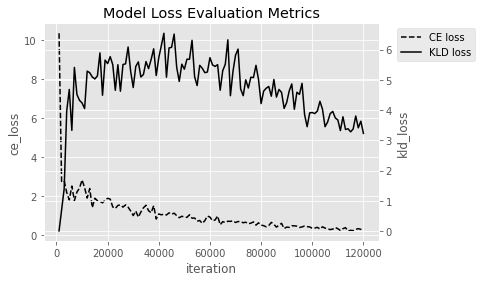

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
x = ax1.plot(df_loss['iteration'], df_loss['ce_loss'], '--',  color='black', label = 'CE loss')
y = ax2.plot(df_loss['iteration'], df_loss['kld_loss'], '-',  color='black', label = 'KLD loss')

ax1.set_xlabel('iteration')
ax1.set_ylabel('ce_loss')
ax2.set_ylabel('kld_loss')

plt.title('Model Loss Evaluation Metrics')
lns = x+y
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()



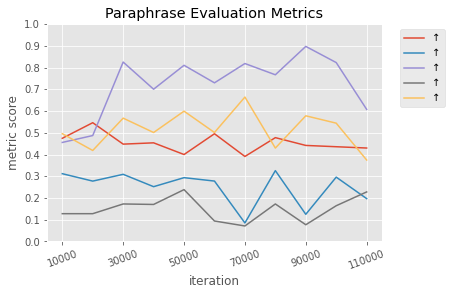

,blue,ter,muse,meteor,rouge,iteration
10,0.197264,0.429851,0.607572,0.227927,0.374704,110000


In [16]:
import numpy as np
eval_types = ['ter', 'blue', 'muse', 'meteor', 'rouge']
optim_type = [u"\u2193", u"\u2191", u"\u2191", u"\u2191", u"\u2191"] # up and down
for idx in range(len(eval_types)):
    plt.plot(df_eval['iteration'], df_eval[eval_type], label=eval_types[idx]+' '+optim_type[idx])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(10000, 120000, step=20000), rotation=20)
plt.xlabel('iteration')
plt.ylabel('metric score')
plt.title('Paraphrase Evaluation Metrics')
plt.show()
df_eval.tail(1)

In [4]:
import pandas as pd

df = pd.read_csv('quora_data/quora_duplicate_questions.tsv', sep='\t', header=0)

In [10]:
df_clean = df[df['is_duplicate']==1][['question1','question2']]
df_clean['question1'].to_csv('quora_data/train_quora.txt', header=None, index=None)
df_clean['question2'].to_csv('quora_data/train_quora_2.txt', header=None, index=None)